In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/np0.smi", header = None, names = ['smiles'])

In [3]:
import os
from rdkit.Chem import rdBase, RDConfig
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors

In [4]:
data['mol'] = data['smiles'].apply(Chem.MolFromSmiles)


RDKit WARNING: [14:10:16] Conflicting single bond directions around double bond at index 1.
RDKit WARNING: [14:10:16]   BondStereo set to STEREONONE and single bond directions set to NONE.


In [5]:
data["smi"] = data['mol'].apply(Chem.MolToSmiles, isomericSmiles=False)

In [15]:
data[["smiles","smi"]].head(n = 200)

,smiles,smi
0,C=C1C(=O)O[C@H]2C[C@@H](C)[C@@H]3CCC(=O)[C@@]3(C)C[C@H]12,C=C1C(=O)OC2CC(C)C3CCC(=O)C3(C)CC12
1,CC(=O)O[C@@H]1c2c(C)coc2C(=O)[C@@]23O[C@@H]2CC[C@H](C)[C@@]13C,CC(=O)OC1c2c(C)coc2C(=O)C23OC2CCC(C)C13C
2,C/C=C(\C)C(=O)O[C@H]1C=C(CO)C(=O)[C@H](OC(C)=O)[C@H]1C(C)C,CC=C(C)C(=O)OC1C=C(CO)C(=O)C(OC(C)=O)C1C(C)C
3,C=C1C(=O)O[C@H]2[C@@H]1[C@H](OC(=O)/C(=C/CO)COC(=O)/C(C)=C/CO)CC(=C)[C@@H]1CC(=O)[C@@H](C)[C@@H]12,C=C1CC(OC(=O)C(=CCO)COC(=O)C(C)=CCO)C2C(=C)C(=O)OC2C2C(C)C(=O)CC12
4,C=C1C(=O)O[C@@H]2[C@H]1CC(=O)[C@H](C)[C@@](O)(C(=O)/C=C/C)[C@H]2OC(=O)[C@H](C)CC,C=C1C(=O)OC2C1CC(=O)C(C)C(O)(C(=O)C=CC)C2OC(=O)C(C)CC
5,C=C1C(=O)O[C@@H]2[C@H]1[C@H](O)C[C@]1(C)[C@@H](O)CC=C(C)[C@@H]21,C=C1C(=O)OC2C1C(O)CC1(C)C(O)CC=C(C)C21
6,C=C(COC(=O)C(C)C)[C@H]1Oc2cc(C(C)=O)ccc2[C@@H]1OC(=O)C(C)C,C=C(COC(=O)C(C)C)C1Oc2cc(C(C)=O)ccc2C1OC(=O)C(C)C
7,O=C(/C=C/c1ccccc1)C[C@@H](O)CCc1ccccc1,O=C(C=Cc1ccccc1)CC(O)CCc1ccccc1
8,C=C1CC[C@H]2[C@@](C)(C(=O)O)CCC[C@]2(C)[C@H]1CC[C@H](C)CCOC(C)=O,C=C1CCC2C(C)(C(=O)O)CCCC2(C)C1CCC(C)CCOC(C)=O
9,COc1cc(C=O)cc(OC)c1OCC=C(C)C,COc1cc(C=O)cc(OC)c1OCC=C(C)C


In [71]:
data['mw'] = data['mol'].apply(Descriptors.MolWt)

In [72]:
data['logp'] = data['mol'].apply(Descriptors.MolLogP)

In [74]:
data['qed'] = data['mol'].apply(Descriptors.qed)

In [76]:
del data['mol']

In [79]:
datanoch = data[["smi","mw","logp","qed"]]
data = data[["smiles","mw","logp","qed"]]

In [80]:
datanoch.to_csv('data/npnoch.csv', index = False)
data.to_csv("data/np.csv", index = False)

In [81]:
d = datanoch

In [122]:
# Remove smiles with three-way rings
goodsmint = []
for n in range(10,100):
    ny = sum(d["smi"].str.contains(str(n)))
    if(n < 10):
        goodsmint.append(n)
    if (n > 9):
        print(n, ny)
        badsmint.append(n)

10 15
11 14
15 121
16 20
17 18
18 14
19 14
20 14
25 91
26 10
27 3
36 63
37 17
46 134
47 14
51 70
52 80
53 57
57 39
61 13
62 12
63 11
64 35
65 101
67 58
68 5
69 1
71 1
73 1
74 3
75 9
76 27
78 10
79 1
84 2
85 4
89 2
96 1
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 35
124 0
125 0
126 1
127 0
128 0
129 0
130 0
131 0
132 40
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 5
143 8
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 3
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 0
185 0
186 0
187 0
188 0
189 0
190 0
191 0
192 0
193 0
194 0
195 0
196 0
197 0
198 0
199 0
200 0
201 0
202 0
203 0
204 0
205 0
206 0
207 0
208 0
209 0
210 0
211 0
212 0
213 23
214 0
215 0
216 0
217 0
218 0
219 0
220 0
221 0
222 0
223 0
224 0
225 0
226 0
227 0
228 0
229 

In [114]:
#badsmint

d["smi"].str.contains("|".join(str(x) for x in badsmint), regex = True)


0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [121]:

d["smi"].iloc[630:633]

630    C=C1C(=O)OC2CC(C)C34CC5(C(=O)OC6CC(C)=C(C(C)CCCO)C(OC(=O)C(C)CC)C65)C(C(C)=C3CC12)C4OC(C)=O
631    C=C1C(=O)OC2CC(C)C34CC5(C(=O)OC6CC(C)=C(C(C)CCCO)C(OC(=O)C(C)CC)C65)C(C(C)=C3CC12)C4OC(C)=O
632    C=C1C(=O)OC2CC(C)C34CC5(C(=O)OC6CC(C)=C(C(C)CCCO)C(OC(=O)C(C)CC)C65)C(C(C)=C3CC12)C4OC(C)=O
Name: smi, dtype: object

In [38]:
Draw.MolsToGridImage(d432["mol"],molsPerRow=4)

NameError: name 'Draw' is not defined

,smiles,mol,smi
1,CC(=O)O[C@@H]1c2c(C)coc2C(=O)[C@@]23O[C@@H]2CC[C@H](C)[C@@]13C,"<img src="""" alt=""Mol""/>",CC(=O)OC1c2c(C)coc2C(=O)C23OC2CCC(C)C13C

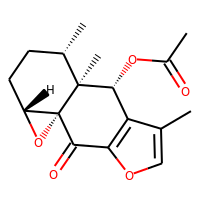

In [70]:
data.iloc[1:2,:]

In [111]:
help(join)

NameError: name 'join' is not defined